In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# get titanic & test csv files as a DataFrame
train = 'https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/train.csv'
test = 'https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/test.csv'

In [57]:
dftrain = pd.read_csv(train)
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
#dftrain['Name'][0]
#'Owen' in dftrain['Name'][0]

for a in dftrain['Name']:
    if "Rose" in a:
        print("YES, boy!",a)
    else:
        continue


YES, boy! Aks, Mrs. Sam (Leah Rosen)


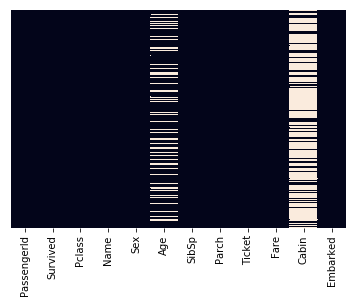

In [11]:
#Check for missing values:
#Shows how many rows are missing per column
sns.heatmap(dftrain.isnull(),yticklabels = False, cbar = False)

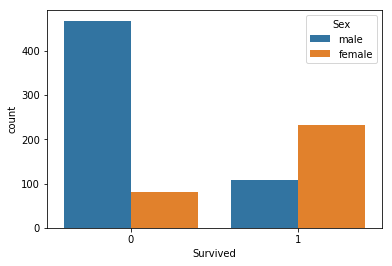

In [16]:
#Check survival data
#By SEX:
sns.countplot(x='Survived',hue = 'Sex',data = dftrain)


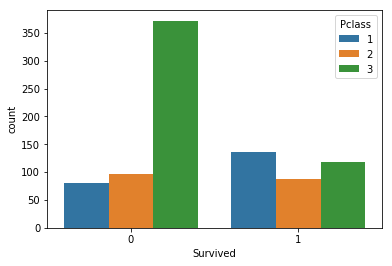

In [17]:
#By passenge class:
sns.countplot(x='Survived',hue = "Pclass",data =dftrain)

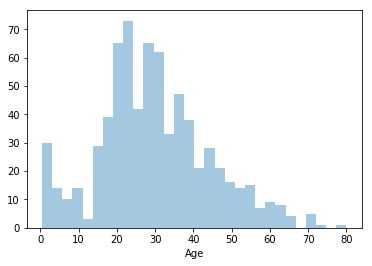

In [18]:
#Check distribution:
sns.distplot(dftrain['Age'].dropna(),kde=False,bins = 30)
#skewed to the right... more younger people

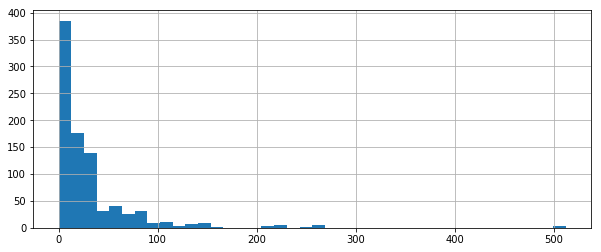

In [20]:
#Explore by Fare:
dftrain['Fare'].hist(bins=40,figsize=(10,4))
#Fares are quite on the low side

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0

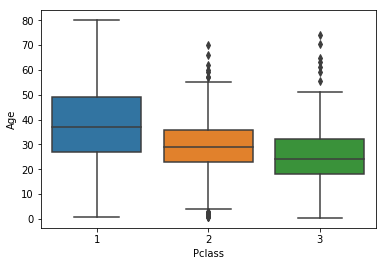

In [36]:
#Clean null in AGE column:
sns.boxplot(x='Pclass',y='Age',data =dftrain)
Age = dftrain[['Age','Pclass']]
Age.groupby(by='Pclass').describe()
#Average age per Pclass

In [43]:
#make function that will replace null values in AGE with the mean values of each Passenger Class:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
        return Age
dftrain["Age"]=dftrain[['Age','Pclass']].apply(impute_age,axis=1)

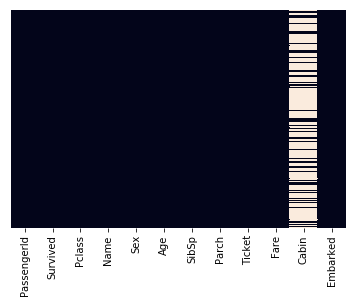

In [45]:
sns.heatmap(dftrain.isnull(),yticklabels = False, cbar = False)

In [48]:
#Create dummy variables:
sex=pd.get_dummies(dftrain['Sex'],drop_first=True)
embark=pd.get_dummies(dftrain['Embarked'],drop_first=True)
dftrain = pd.concat([dftrain,sex,embark],axis =1)

In [53]:
#Drop other unneeded  columns:
#dftrain.drop(['Cabin','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
dftrain.dropna(inplace=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,25.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0
